In [16]:
import numpy as np
import pandas as pd
import seaborn as sns                       
import matplotlib.pyplot as plt             
%matplotlib inline     
sns.set(color_codes=True)

In [17]:
df = pd.read_csv(r'D:\Projects\adult\adult.csv')
df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'adult.csv'

In [3]:
df.columns = df.columns.str.replace(' ', '_').str.replace('.', '_')
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

In [5]:
df['marital_status'].value_counts()

marital_status
Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: count, dtype: int64

In [6]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
income            object
dtype: object

In [7]:
df.shape

(32561, 15)

In [8]:
print(df.isna().sum())

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64


In [9]:
df['workclass'].value_counts()

workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64

In [10]:
df['workclass'] = df['workclass'].replace('?', 'Unknown')

<Axes: xlabel='capital_loss'>

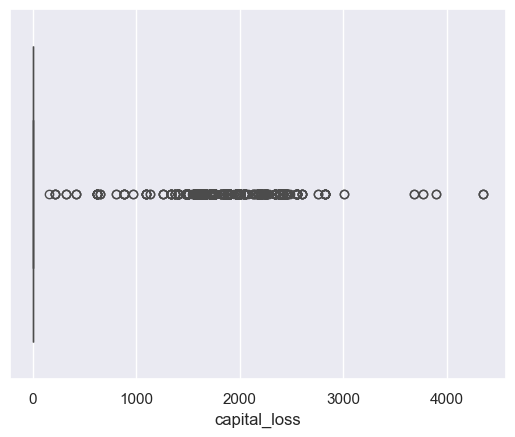

In [12]:
sns.boxplot(x=df['capital_loss'])

In [13]:
df.groupby(['sex', 'income'])['income'].count()

sex     income
Female  <=50K      9592
        >50K       1179
Male    <=50K     15128
        >50K       6662
Name: income, dtype: int64

In [15]:
pd.crosstab([df.sex,df.income],df.marital_status,margins=True).style.background_gradient(cmap='summer_r')

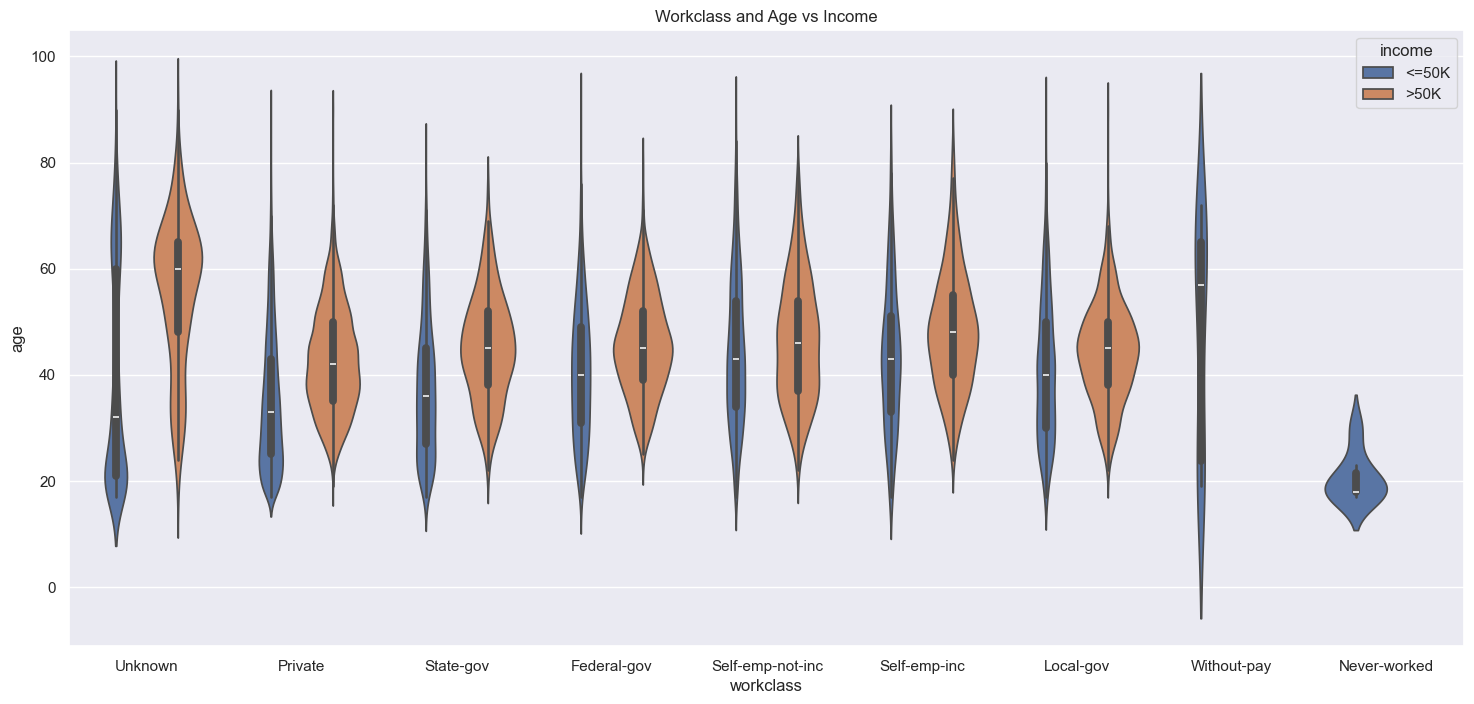

In [24]:
f,ax=plt.subplots(1,figsize=(18,8))
sns.violinplot(x='workclass', y='age', hue='income', data=df)
ax.set_title('Workclass and Age vs Income')
plt.show()


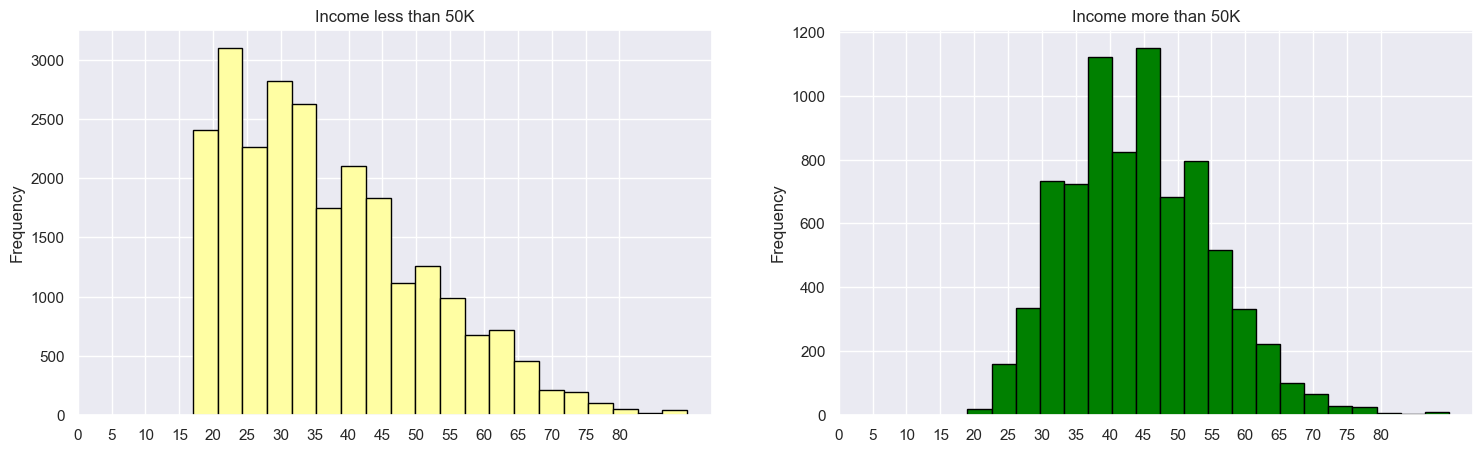

In [31]:
f,ax=plt.subplots(1,2,figsize=(18,5))
df[df['income']=="<=50K"].age.plot.hist(ax=ax[0],bins=20,edgecolor='black',color='#fffea3')
ax[0].set_title('Income less than 50K')
x1=list(range(0,85,5))
ax[0].set_xticks(x1)
df[df['income']==">50K"].age.plot.hist(ax=ax[1],bins=20,edgecolor='black',color='green')
x2=list(range(0,85,5))
ax[1].set_xticks(x2)
ax[1].set_title('Income more than 50K')
plt.show()